In [1]:
#Compare CLT and t-distr. approximation (different sample sizes)

In [2]:
library(dplyr)
dat <- read.csv('mice_pheno.csv')


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [3]:
controlPop <- filter(dat,Sex=='F' & Diet=='chow') %>%
select(Bodyweight) %>% unlist

In [6]:
#Generate t-stat UNDER NULL (DO NOT FILTER FOR HF)
tgenerate <- function(n) {
    cases <- sample(controlPop, n)
    controls <- sample(controlPop, n)
    tstat <- (mean(cases) - mean(controls))/
    sqrt(var(cases)/n + var(controls)/n)
    return(tstat)
}

ttests <- replicate(1000, tgenerate(10))

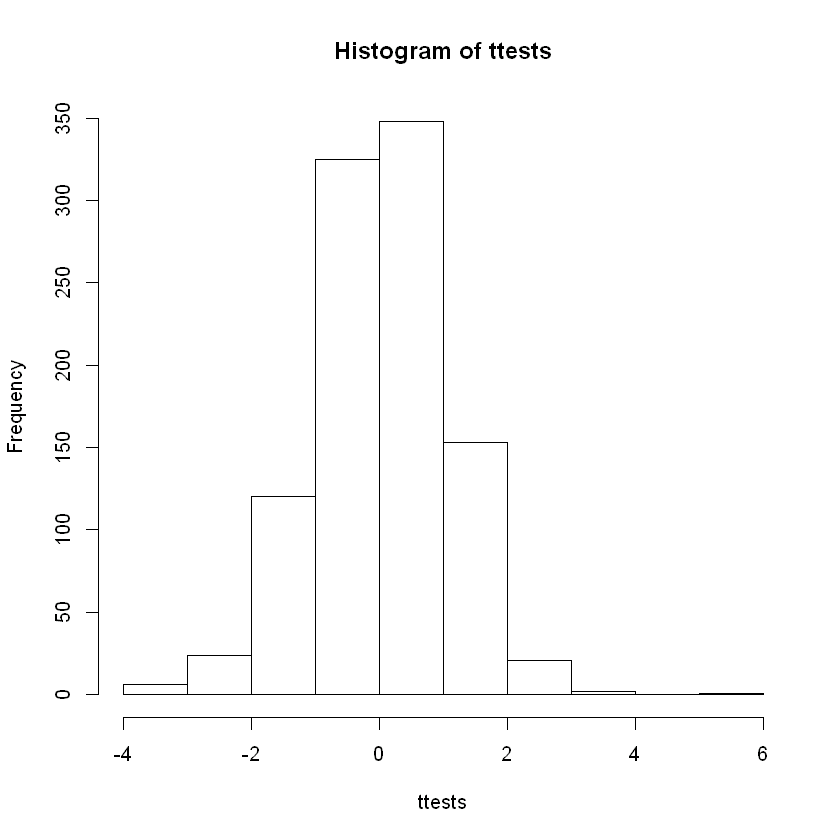

In [7]:
hist(ttests)

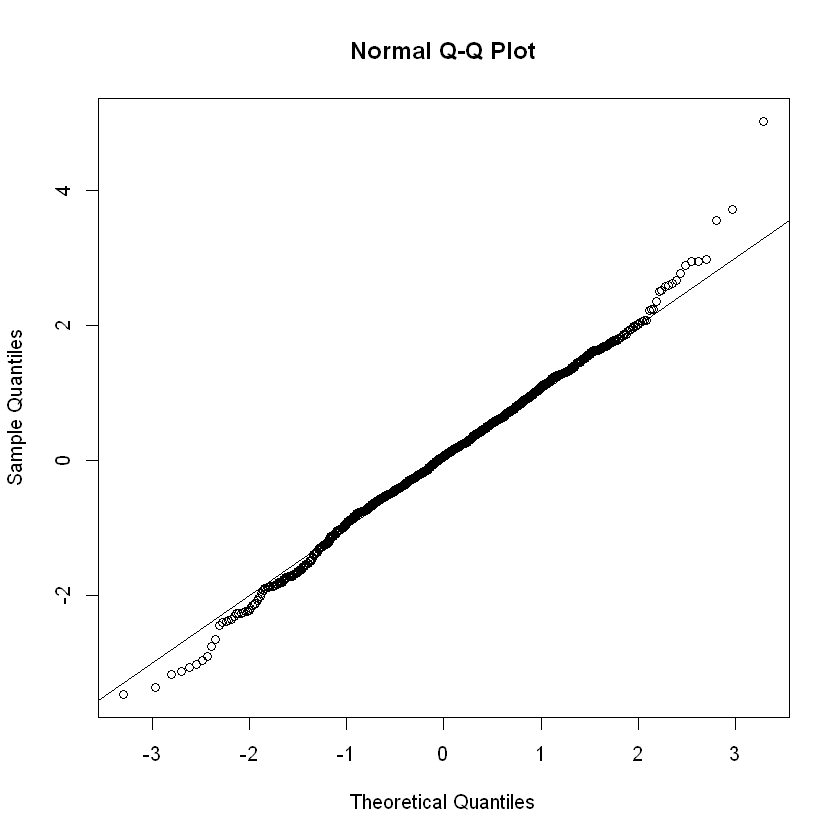

In [8]:
qqnorm(ttests)
abline(0,1)

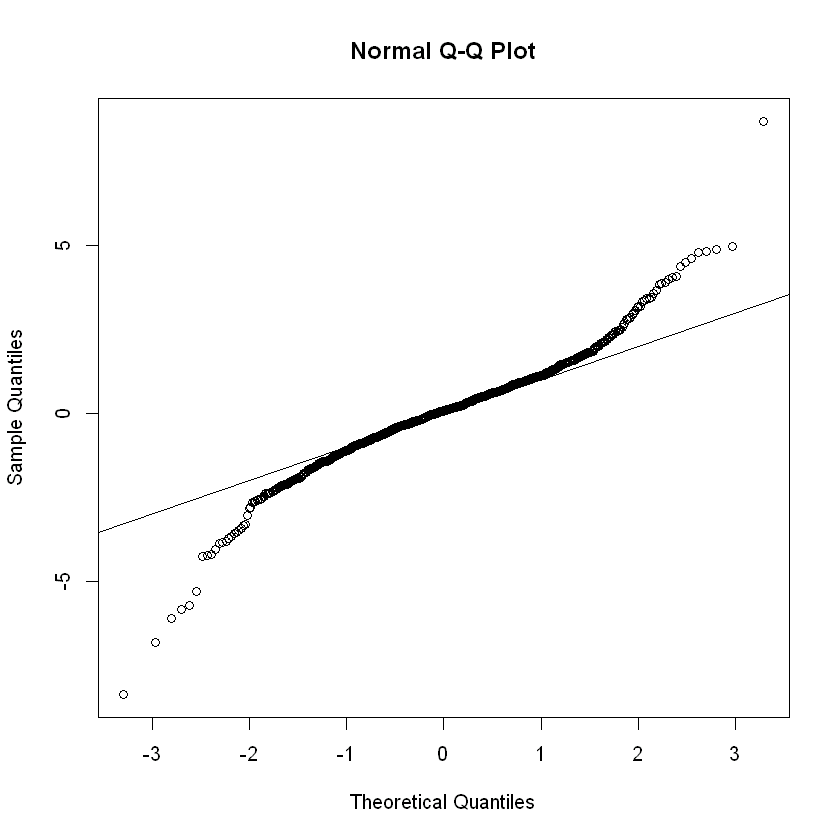

In [9]:
ttests <- replicate(1000, tgenerate(3))
qqnorm(ttests)
abline(0,1)

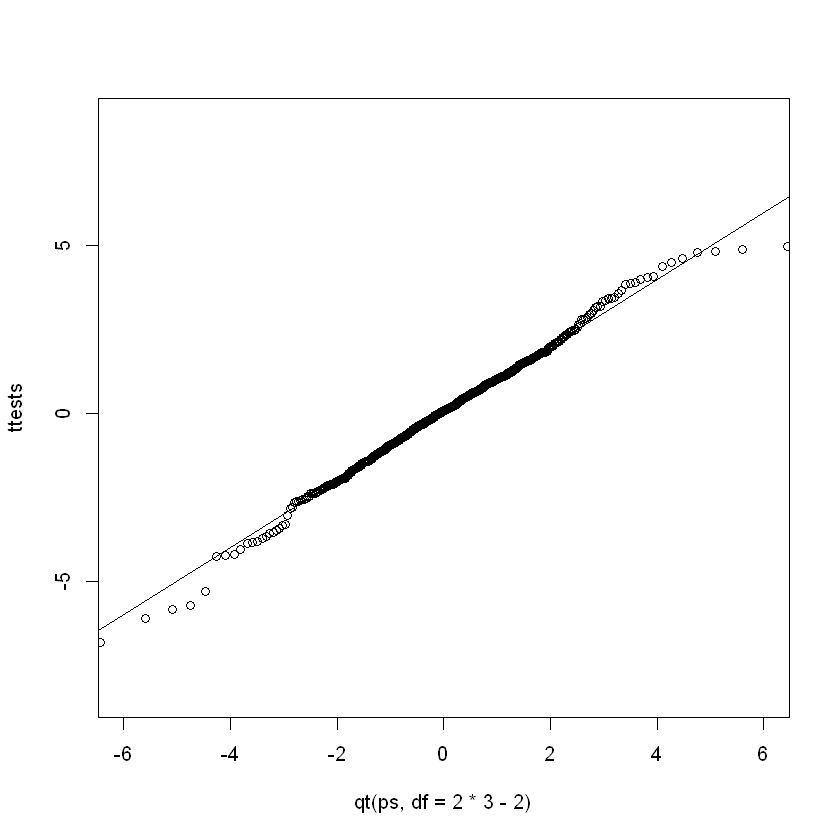

In [10]:
#tails are larger due to smaller sample size
#Given the small sample and normal distribution
#We should have better results with t-distribution
ps <- (seq(0,999)+0.5)/1000
qqplot(qt(ps,df=2*3-2),ttests,xlim=c(-6,6))
abline(0,1)

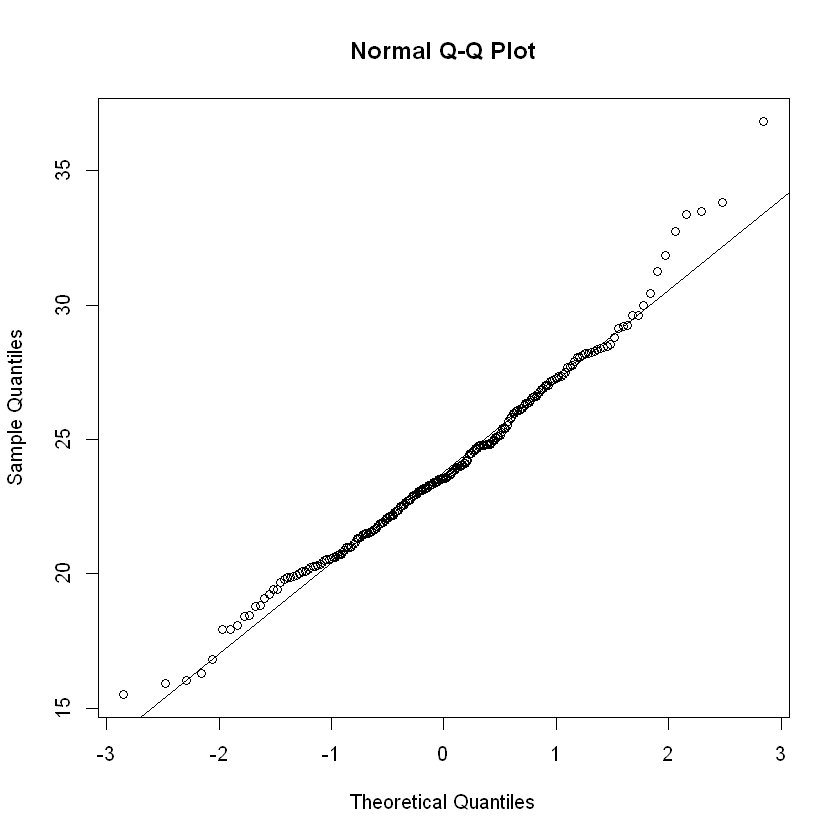

In [14]:
#Lets observe the actual data rather than simulations
qqnorm(controlPop)
qqline(controlPop)